# Funciones de transición

Las funciones de transición modelan el comportamiento de la **compuertas** en los canales de iones de las neuronas en términos de probabilidades.  Para cada compuerta se utilizan dos funciones que dependen del voltaje de polarización $V$ de la membrana:

* $\alpha(V)$ probabilidad de que una compuerta transite de cerrada a abierta.
* $\beta(V)$ probabilidad de que una compuerta transite de abierta a cerrada.

Experimentalmente se ha observado que su forma general es:
\begin{align}
  \alpha(V) \text{ ó } \beta(V)  = \frac{A + BV}{C + H e^{\left(\frac{V+D}{F}\right)}}
\end{align}

donde $V$ está medido con respecto al potencial de reposo $V_r$ y los coeficientes $A$, $B$, $C$, $D$, $F$ y $H$ varían para diferentes tipos de canales.

## Canales de potasio

Los valores medidos por Hodkin y Huxley para la compuerta de **potasio (K)**, fueron:

\begin{align}
  \alpha_n(V) &= \frac{0.01(10 - V)}{e^{\left(\frac{10-V}{10}\right)} - 1} & \beta_n(V) &= 0.125 e^{-\frac{V}{80}}
\end{align}

con las constantes en milivolts (mV).

## Cálculo numérico
Para simular el comportamiento de la neurona es necesario calcular cuidadosamente el valor de estas funciones. Dessarrollemos el ejemplo de la compuerta de potasio. Particularmente, hay un problema cuando $V = 10$ pues la función $\alpha_n$ está indefinida. Para que la simulación no falle al acercarse a este valor, utilizamos la regla de L'Hôpital, que nos dice que el valor al cual tiende esta función en el límite cuando $V \rightarrow 10$.

### Regla de L'Hôpital

$$lim_{x \rightarrow 1} \frac{f(x)}{g(x)} = \frac{f'(x)}{g'(x)} $$

Aplicada a la función $\alpha_n$:

\begin{align}
  \alpha_n(10) &= \frac{-0.01}{e^{\left(\frac{10-V}{10}\right)}(-0.1)}
               = \frac{-0.01}{-0.1} = 0.1
\end{align}


# Implementación

Para implementar el cálculo de esta función se debe considerar el valor donde queda indeterminada
 como un caso especial y ser devuelto manualmente, en lugar de usar la función original.
 

In [13]:
using GLMakie
using LaTeXStrings
using Logging


Logging.disable_logging(Logging.Info)

LogLevel(1)

In [14]:
include("code/funciones.jl")

g_k (generic function with 1 method)

Ahora podemos ver como, en la vecindad de $V = 10$ la función es continua hasta una precisión de $\varepsilon = 0.00001$.

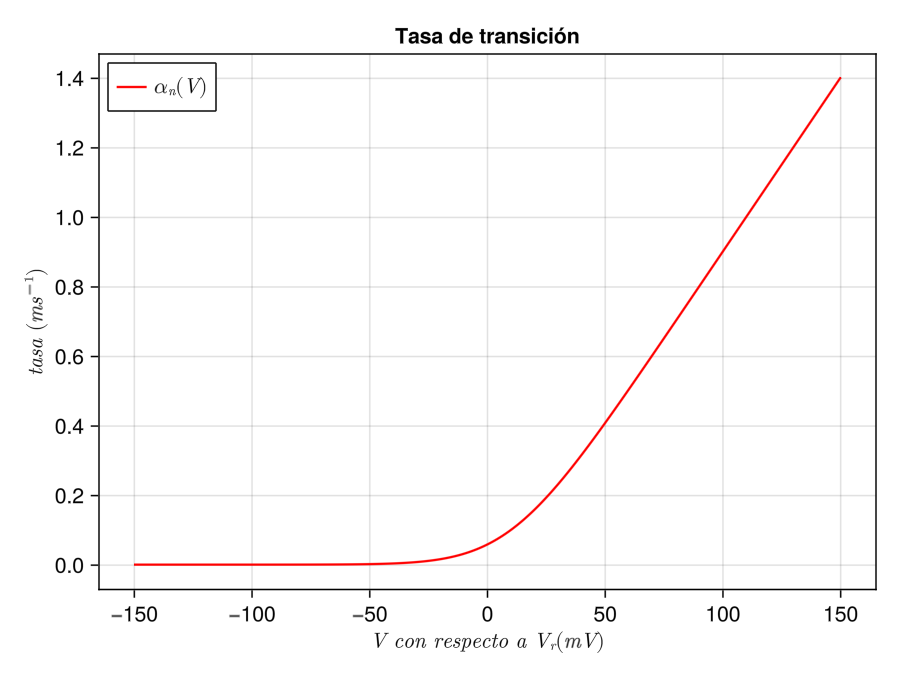

In [16]:
V = -150:0.01:150
alpha_n_values = alpha_n.(V)
beta_n_values = beta_n.(V)

fig = Figure()
ax =  Axis(
    fig[1, 1],
    title="Tasa de transición",
    xlabel=L"V \textit{ con respecto a } V_r (mV)",
    ylabel=L"\textit{tasa } (ms^{-1})",
    xticks=[-150, -100, -50, 0, 50, 100, 150],
    yticks=[0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4]
)

lines!(ax, V, color=:red, alpha_n_values, label=L"\alpha_n(V)")
axislegend(ax, position=:lt)

fig

El caso para $\beta$ es más sencillo, pues no hay discontinuidad.

Ahora es interesante observar el comportamiento de ambas probabilidades para los mismos voltajes.

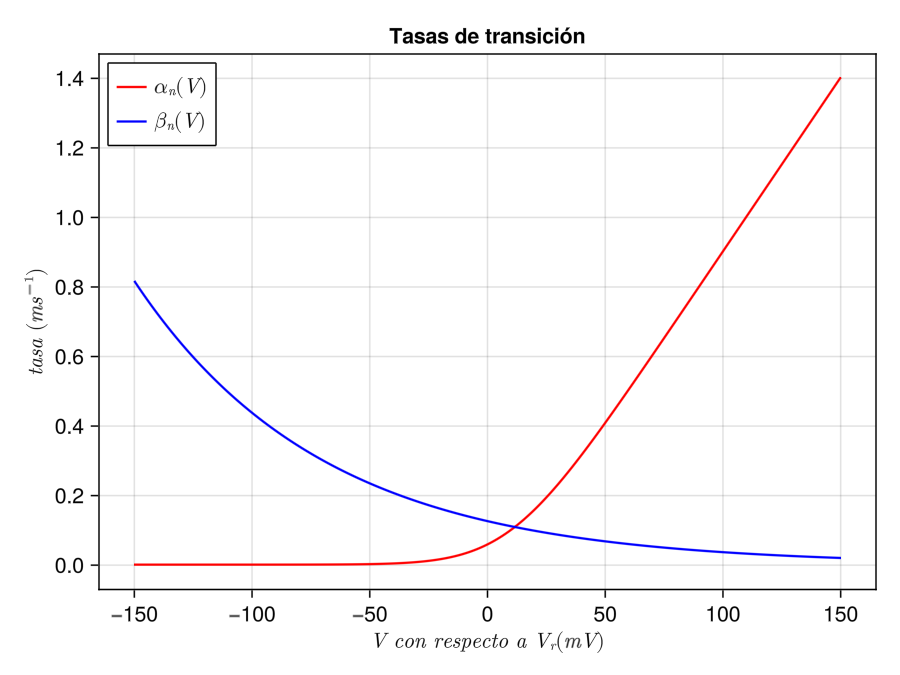

In [18]:
"""
Grafica las funciones de transición para el potasio.
"""
V = -150:0.01:150
alpha_n_values = alpha_n.(V)
beta_n_values = beta_n.(V)

fig = Figure()
ax =  Axis(
    fig[1, 1],
    title="Tasas de transición",
    xlabel=L"V \textit{ con respecto a } V_r (mV)",
    ylabel=L"\textit{tasa } (ms^{-1})",
    xticks=[-150, -100, -50, 0, 50, 100, 150],
    yticks=[0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4]
)

lines!(ax, V, color=:red, alpha_n_values, label=L"\alpha_n(V)")
lines!(ax, V, color=:blue, beta_n_values, label=L"\beta_n(V)")
axislegend(ax, position=:lt)

fig

Nótese cómo a voltajes bajos, la probabilidad de que la compuerta se cierre es más alta, mientras que a voltajes altos, lo más probable es que se abra.